In [89]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [90]:
#Load dataset and divide them into train : test =8:2
df1=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-00s.csv')
df2=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-10s.csv')
DATA=pd.concat([df1,df2])
DATA=DATA.sample(frac=1.0)
DATA.reset_index(drop=True, inplace=True)#shuffle the dataset
DATA.to_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/data set with missing data.csv")
DATA_numerical=DATA.drop(['track'], axis=1)
DATA_numerical=DATA_numerical.drop(['artist','uri'], axis=1)
DATA_numerical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.875,0.4670,7,-13.991,1,0.1530,0.001100,0.102000,0.0729,0.3730,125.961,446364,4,33.26260,14,0
1,0.827,0.6460,9,-6.498,1,0.0319,0.010400,0.700000,0.1120,0.6130,127.978,324640,4,27.67006,9,0
2,0.545,0.8650,11,-5.708,0,0.0286,0.006640,0.000011,0.1680,0.5430,99.010,233933,4,20.13497,13,1
3,0.553,0.3140,4,-9.217,1,0.0396,0.306000,0.000578,0.1040,0.5850,91.700,188187,4,29.19948,8,0
4,0.755,0.7000,1,-3.586,1,0.0455,0.084600,0.000000,0.4520,0.3830,81.514,216653,4,62.71197,11,1
5,0.458,0.9930,0,-3.150,1,0.0914,0.000122,0.000274,0.3970,0.0596,110.051,261373,4,86.69047,9,0
6,0.610,0.2290,11,-12.360,0,0.0333,0.558000,0.041300,0.1130,0.1900,111.887,186293,4,39.68914,8,1
7,0.464,0.8220,1,-1.881,1,0.2940,0.056800,0.000000,0.1030,0.7220,79.973,202641,4,61.71976,8,1
8,0.535,0.4980,11,-11.939,1,0.0373,0.860000,0.000002,0.0576,0.5380,118.046,147147,4,29.94313,6,0
9,0.528,0.8710,9,-8.010,1,0.1220,0.125000,0.000000,0.2300,0.6750,181.909,228438,4,64.79903,7,1


In [95]:
DATA_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/data set with missing data.csv",
                      encoding='unicode_escape')
DATA_miss

,Unnamed: 0,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0,House Ain't Back (It Never Went Away) - Origin...,Jamie Jones,spotify:track:3TiS0DnUfrGS8AJfzgM4jI,NaN,0.4670,7,-13.991,1,0.1530,0.001100,0.102000,0.0729,0.3730,125.961,446364,4,33.26260,14,0
1,1,Around The House,Tensnake,spotify:track:6FO5xxQ9vFkxBQVVKr3TRw,NaN,0.6460,9,-6.498,1,0.0319,0.010400,0.700000,0.1120,0.6130,127.978,324640,4,27.67006,9,0
2,2,Kryptonite,3 Doors Down,spotify:track:6ZOBP3NvffbU4SZcrnt1k6,NaN,0.8650,11,-5.708,0,0.0286,0.006640,0.000011,0.1680,0.5430,99.010,233933,4,20.13497,13,1
3,3,Turtles All the Way Down,Sturgill Simpson,NaN,NaN,0.3140,4,-9.217,1,0.0396,0.306000,0.000578,0.1040,0.5850,91.700,188187,4,29.19948,8,0
4,4,Play No Games,Big Sean Featuring Chris Brown & Ty Dolla $ign,NaN,NaN,0.7000,1,-3.586,1,0.0455,0.084600,0.000000,0.4520,0.3830,81.514,216653,4,62.71197,11,1
5,5,Grey Sublime Archon,Eluveitie,NaN,NaN,0.9930,0,-3.150,1,0.0914,0.000122,0.000274,0.3970,0.0596,110.051,261373,4,86.69047,9,0
6,6,4422,Drake Featuring Sampha,NaN,NaN,0.2290,11,-12.360,0,0.0333,0.558000,0.041300,0.1130,0.1900,111.887,186293,4,39.68914,8,1
7,7,Ye vs The People,Kanye West Featuring T.I.,NaN,NaN,0.8220,1,-1.881,1,0.2940,0.056800,0.000000,0.1030,0.7220,79.973,202641,4,61.71976,8,1
8,8,Elo Re Chaitanyer Gari,Purna Das Baul,NaN,NaN,0.4980,11,-11.939,1,0.0373,0.860000,0.000002,0.0576,0.5380,118.046,147147,4,29.94313,6,0
9,9,How Am I Doin',Dierks Bentley,NaN,NaN,0.8710,9,-8.010,1,0.1220,0.125000,0.000000,0.2300,0.6750,181.909,228438,4,64.79903,7,1


In [96]:
DATA_miss.isnull().sum()

Unnamed: 0             0
track                  0
artist                30
uri                  815
danceability        1704
energy                 0
key                    0
loudness               0
mode                   0
speechiness          604
acousticness          40
instrumentalness      47
liveness               0
valence                0
tempo                  0
duration_ms            0
time_signature         0
chorus_hit             0
sections               0
target                 0
dtype: int64

In [97]:
DATA_miss=DATA_miss.sample(frac=1.0)
DATA_miss.reset_index(drop=True, inplace=True)#shuffle the dataset
#DATA
train_set_miss=DATA_miss.loc[0:9816]
test_set_miss=DATA_miss.loc[9817:12270]
test_set_miss.reset_index(drop=True, inplace=True)
print("split the dataset into the proportion train:test=8:2 ")
print("size of train set=",train_set_miss.shape)
print("size of test set=",test_set_miss.shape)
df=test_set_miss.loc[test_set_miss['target'].isin(['1'])]
print("the target is 1 in test",df.shape)
test_set_miss.to_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/test_set_miss.csv")
train_set_miss.to_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/train_set_miss.csv")
print("Save train and test dataset successfully!")

split the dataset into the proportion train:test=8:2 
size of train set= (9817, 20)
size of test set= (2437, 20)
the target is 1 in test (1222, 20)
Save train and test dataset successfully!


In [98]:
train_set_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/train_set_miss.csv",
                      encoding='unicode_escape')
train_set_miss=train_set_miss.drop(["Unnamed: 0"],axis=1)
test_set_miss=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/test_set_miss.csv",
                     encoding='unicode_escape').drop(["Unnamed: 0"],axis=1)
print("size of train set=",train_set_miss.shape)
print("size of test set=",test_set_miss.shape)
#train_set

size of train set= (9817, 20)
size of test set= (2437, 20)


In [99]:
def MissValue(data):
    miss_ratio = (DATA_miss.isnull().sum() / len(DATA_miss)) * 100
    miss_ratio = miss_ratio.sort_values(ascending=False)
    AllNull_train_ratio = miss_ratio.drop(miss_ratio[miss_ratio == 0].index)
    missing_train_ratio = pd.DataFrame({'Missing train data ratio': AllNull_train_ratio})
    print(missing_train_ratio)

    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')  # ratate direction of words for each feature
    sns.barplot(x=miss_ratio.index, y=miss_ratio)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent', fontsize=15)
    plt.title('Percentage of Missing Data', fontsize=15)
    plt.show()

                  Missing train data ratio
danceability                     13.905663
uri                               6.650890
speechiness                       4.929003
instrumentalness                  0.383548
acousticness                      0.326424
artist                            0.244818


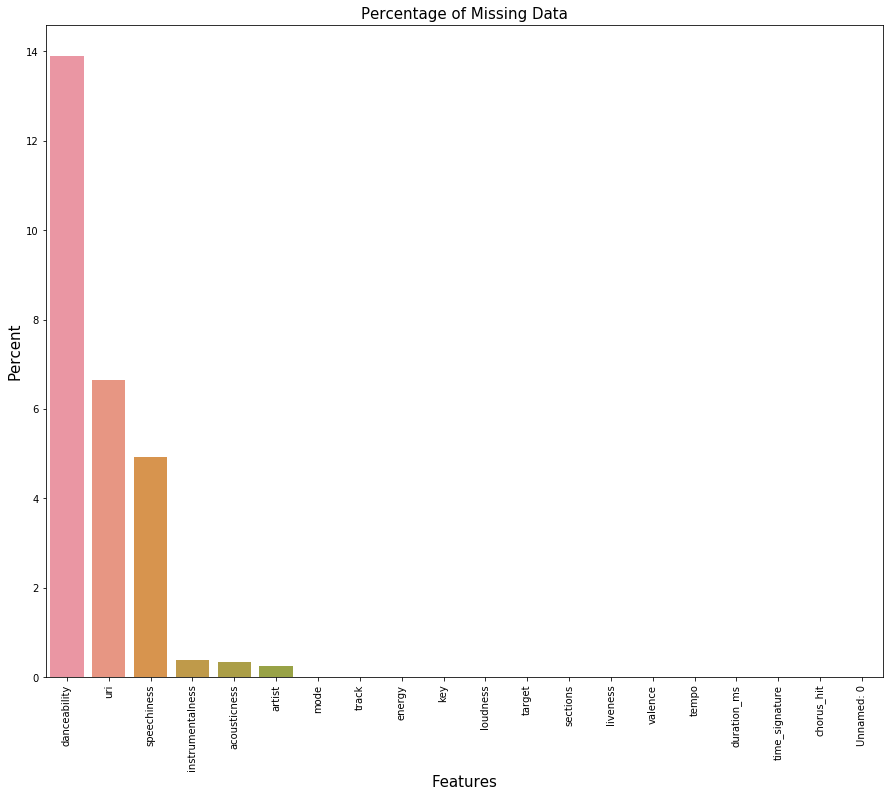

In [100]:
MissValue(DATA_miss)

In [101]:
train_set_miss.isnull().sum()

Unnamed: 0.1           0
track                  0
artist                25
uri                  651
danceability        1375
energy                 0
key                    0
loudness               0
mode                   0
speechiness          485
acousticness          36
instrumentalness      42
liveness               0
valence                0
tempo                  0
duration_ms            0
time_signature         0
chorus_hit             0
sections               0
target                 0
dtype: int64

                  Missing train data ratio
danceability                     13.905663
uri                               6.650890
speechiness                       4.929003
instrumentalness                  0.383548
acousticness                      0.326424
artist                            0.244818


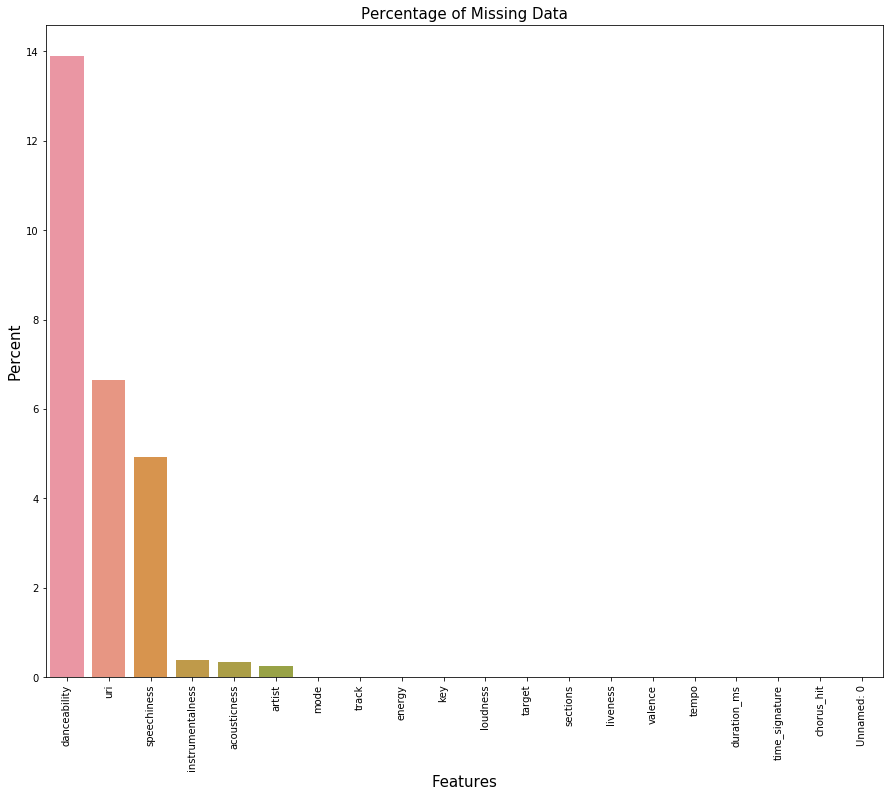

In [102]:
MissValue(train_set_miss)

                  Missing train data ratio
danceability                     14.006316
uri                               6.631354
speechiness                       4.940409
instrumentalness                  0.427829
acousticness                      0.366711
artist                            0.254660


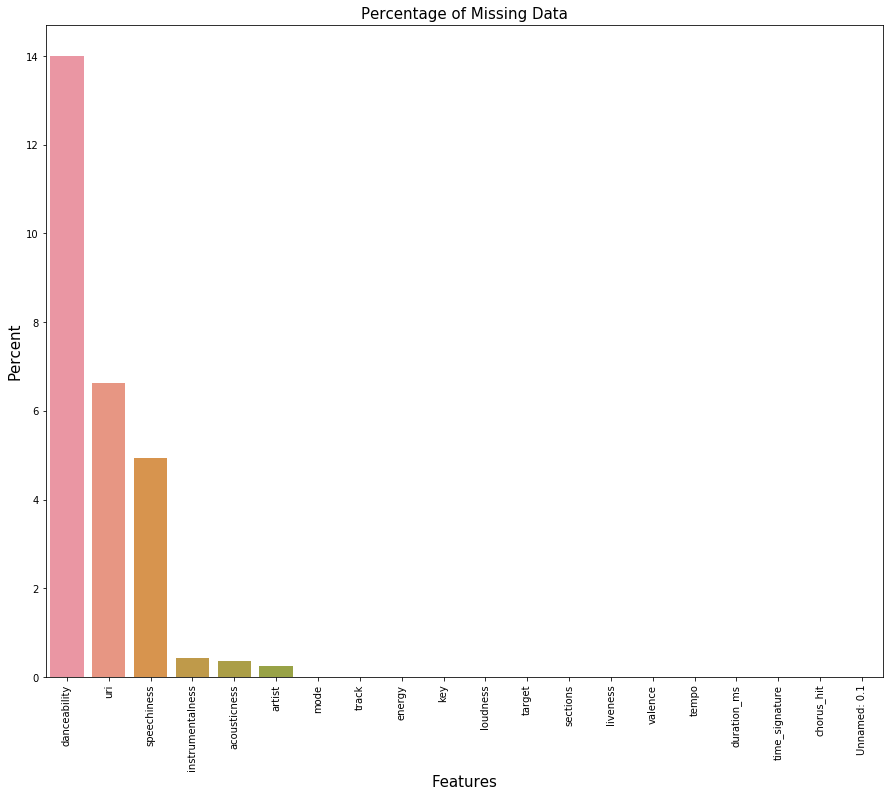

In [103]:
miss_ratio = (train_set_miss.isnull().sum() / len(train_set_miss)) * 100
miss_ratio = miss_ratio.sort_values(ascending=False)
AllNull_train_ratio = miss_ratio.drop(miss_ratio[miss_ratio == 0].index)
missing_train_ratio = pd.DataFrame({'Missing train data ratio': AllNull_train_ratio})
print(missing_train_ratio)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')  # ratate direction of words for each feature
sns.barplot(x=miss_ratio.index, y=miss_ratio)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent', fontsize=15)
plt.title('Percentage of Missing Data', fontsize=15)
plt.show()

In [104]:
#delete "uri and artist"
train_miss_numerical=train_set_miss.drop(['track'], axis=1)
train_miss_numerical=train_miss_numerical.drop(['artist','uri','Unnamed: 0.1'], axis=1)
train_miss_numerical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.274,0.91500,1,-5.259,0,0.1670,0.013900,0.000074,0.1610,0.4190,169.161,203707,4,97.39924,7,0
1,0.621,0.85300,2,-5.735,0,0.0253,0.076700,0.000003,0.0893,0.7140,128.142,229413,4,45.81638,10,1
2,0.594,0.72100,2,-7.812,1,0.0957,0.020900,0.000009,0.0879,0.2530,128.942,234653,4,30.51199,11,1
3,0.451,0.95100,1,-3.754,1,0.0645,0.000380,0.000002,0.2610,0.4420,162.065,213933,4,24.16702,10,1
4,0.816,0.51700,8,-10.058,1,0.0523,0.608000,0.304000,0.1440,0.5640,99.988,261507,4,53.49083,9,0
5,0.810,0.62500,11,-3.593,0,0.0710,0.040700,0.000002,0.1180,0.5980,100.019,137448,4,29.54025,10,1
6,0.443,0.04500,7,-24.951,1,0.0406,0.991000,0.794000,0.1130,0.4490,115.223,366000,4,72.82041,17,0
7,0.744,0.85900,11,-3.166,1,0.0795,0.025600,0.000063,0.0881,0.7870,91.977,232787,4,31.48360,12,1
8,0.566,0.50700,6,-6.973,1,0.0279,0.535000,0.006190,0.1070,0.1410,158.119,253373,4,37.72111,10,1
9,0.368,0.82200,1,-10.748,0,0.0810,0.074700,0.000624,0.6310,0.4080,161.428,270133,4,48.49545,7,0


In [105]:
#for missing value in instrumentalness and acousticness - delete the datapoint
train_miss_numerical=train_miss_numerical.dropna(subset=['instrumentalness',
                                                        'acousticness'], how='any')
train_miss_numerical.shape

(9752, 16)

In [117]:
from sklearn.impute import KNNImputer
impute_knn=KNNImputer(n_neighbors=2)
impute_knn.fit(train_miss_numerical)
impute_knn_=impute_knn.transform(train_miss_numerical)
df_train=pd.DataFrame(impute_knn_)

df_train.columns = ['danceability','energy','key','loudness','mode','speechiness','acousticness',
                   'instrumentalness','liveness','valence','tempo','duration_ms','time_signature','chorus_hit',
                    'sections','target']
df_train

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.2740,0.91500,1.0,-5.259,0.0,0.16700,0.013900,0.000074,0.1610,0.4190,169.161,203707.0,4.0,97.39924,7.0,0.0
1,0.6210,0.85300,2.0,-5.735,0.0,0.02530,0.076700,0.000003,0.0893,0.7140,128.142,229413.0,4.0,45.81638,10.0,1.0
2,0.5940,0.72100,2.0,-7.812,1.0,0.09570,0.020900,0.000009,0.0879,0.2530,128.942,234653.0,4.0,30.51199,11.0,1.0
3,0.4510,0.95100,1.0,-3.754,1.0,0.06450,0.000380,0.000002,0.2610,0.4420,162.065,213933.0,4.0,24.16702,10.0,1.0
4,0.8160,0.51700,8.0,-10.058,1.0,0.05230,0.608000,0.304000,0.1440,0.5640,99.988,261507.0,4.0,53.49083,9.0,0.0
5,0.8100,0.62500,11.0,-3.593,0.0,0.07100,0.040700,0.000002,0.1180,0.5980,100.019,137448.0,4.0,29.54025,10.0,1.0
6,0.4430,0.04500,7.0,-24.951,1.0,0.04060,0.991000,0.794000,0.1130,0.4490,115.223,366000.0,4.0,72.82041,17.0,0.0
7,0.7440,0.85900,11.0,-3.166,1.0,0.07950,0.025600,0.000063,0.0881,0.7870,91.977,232787.0,4.0,31.48360,12.0,1.0
8,0.5660,0.50700,6.0,-6.973,1.0,0.02790,0.535000,0.006190,0.1070,0.1410,158.119,253373.0,4.0,37.72111,10.0,1.0
9,0.3680,0.82200,1.0,-10.748,0.0,0.08100,0.074700,0.000624,0.6310,0.4080,161.428,270133.0,4.0,48.49545,7.0,0.0
